<a href="https://colab.research.google.com/github/MariaMaj59/neirons-learn/blob/main/3_CNN_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Входные данные - следить, чтобы количество пикселей было кратно размеру max-pooling

# Зачем расширять границы изображения? - чтобы картинка не уменьшилась после свертки
# Самый быстрый вариант - заполнить нулями

# Conv2D
#     Сверточный слой - или слой активации:
#     Для каждого фрагмента n*n умножает писели на коэффициенты и суммирует полученные значения
#     Фрагменты пересекаются, т.е. имеют общие пиксели

# Ядро свертки - набор коэффициентов в слое активации (аналог весов)

# MAX-Pooling
#     Понижает разрешение картинки, сохраняя максимальную интернсивность изображения

# Flatten
# Вытягивает данные в строку

In [ ]:
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from keras.preprocessing import image # для отрисовки изображения
from keras.optimizers import Adam, Adadelta
from keras import utils
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
from google.colab import drive

%matplotlib inline

In [ ]:
drive.mount('contant/drive')

11490434/11490434 [==============================] - 0s 0us/step


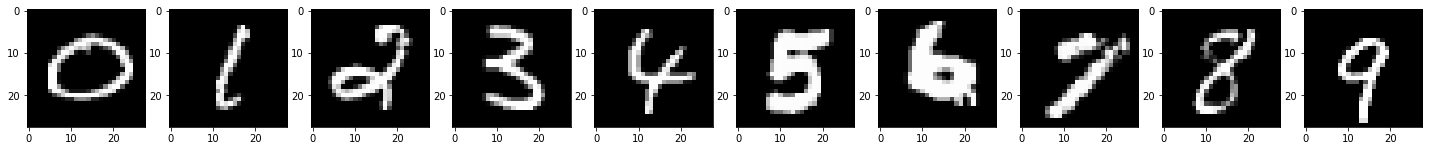

In [ ]:
# ЗАГРУЖАЕМ ДАТАСЕТ
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Выводим для примера картинки
fig, axs = plt.subplots(1, 10, figsize=(25,3)) # полотно из 10 графиков
for i in range(10):
  label_indexes = np.where(y_train == i)[0]           # список подходящих индексов
  index = random.choice(label_indexes)                 # случайный из индексов
  img = x_train[index]                                # выбираем нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap = 'gray')  # отображаем изображение i-м графиком

In [ ]:
# Переводим y в формат one code encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы сверточная сеть понимала, что это черно-белые данные.
# Альтернатива: x_train = x_train[..., None]
# Если картинки цветные, то вместо этого в последнем канале нужно добавить цвета каждого пикселя (в готовых датасетах это чаще всего уже сделано - надо проверять)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
# Нейронная сеть

# задаем batch_size
batch_size = 128
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))                # слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))  # сверточный слой
# 32                      - количество фильтров 
# (3, 3)                  - размер фильтра 
# 3                           запись аналогичная той, что выше
# padding = 'same'        - дополнение краев нулями
#           'valid'       - не дополнять края
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                             # слой подвыборки
# уменьшаяем в (y, x) раз по высоте/ширине соответственно
model.add(Dropout(0.25))                                              # слой регуляризации 

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Компилируем модель:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Обучаем сеть на данных mnist
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), verbose = 1)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test), verbose = 1)

Epoch 1/2
469/469 [==============================] - 160s 341ms/step - loss: 0.1187 - accuracy: 0.9640 - val_loss: 0.0432 - val_accuracy: 0.9854
Epoch 2/2
469/469 [==============================] - 158s 337ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0384 - val_accuracy: 0.9872


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)             

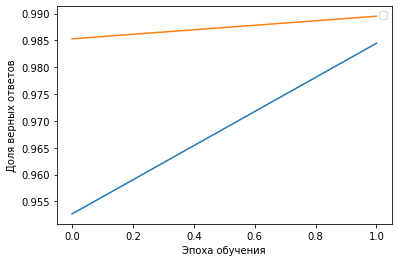

In [ ]:
# Отображаем график точности обучения
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

model.summary() # выводит информацию о модели

In [ ]:
# Определим цифру из тестовой выборки
n = 512
prediction=model.predict(x_test)

print('Выход сети:', prediction[n])
print('Распознанная цифра:', np.argmax(prediction[n]))
print('Верный ответ:', np.argmax(y_test[n]))

313/313 [==============================] - 7s 21ms/step
Выход сети: [3.5572057e-08 7.4123900e-06 9.9999171e-01 1.3533750e-07 3.2196197e-11
 1.1563929e-10 1.5198093e-10 3.3442550e-08 5.4130868e-07 4.5791829e-10]
Распознанная цифра: 2
Верный ответ: 2


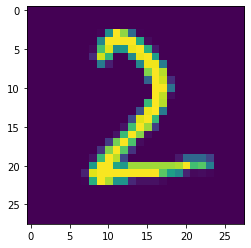

In [ ]:
# Смотрим на эту цифру
plt.imshow(x_test[n,:,:,0])